<a href="https://colab.research.google.com/github/DaverArenas/DeepLearning_ImageClassification/blob/main/IA_DA_WebScraping_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web scraping de imágenes en google, a partir de una búsqueda con palabras claves

In [ ]:
!pip install selenium
!pip install boto3

In [2]:
!apt-get update
!apt install chromium-chromedriver

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [3]:
import os, sys, time
import json, requests, shutil
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from PIL import Image
import hashlib
import urllib
from binascii import a2b_base64
import matplotlib.pyplot as plt
import io

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [9]:
def scraping(searchtext,download_path, num_requested=1000):
  number_of_scrolls = num_requested / 400 + 1 # En cada scroll se pueden descargar 400 imágenes
  download_path=download_path + searchtext.replace(" ", "_")
  if not os.path.exists(download_path + searchtext.replace(" ", "_")):
    os.makedirs(download_path + searchtext.replace(" ", "_"))
 
  url = f'https://www.google.co.in/search?q={searchtext}&source=lnms&tbm=isch'
  
  #driver = webdriver.Chrome('D:/Install/chromedriver.exe')
  #Opción en colab
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver =webdriver.Chrome('chromedriver',options=chrome_options)
  ########################################################################
  #driver = webdriver.Firefox()
  
  driver.get(url)
 
  headers = {}
  headers['User-Agent'] = "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36"
  extensions = { "jpg", "jpeg", "png", "gif" }
  img_count = 0
  downloaded_img_count = 0
  
  for _ in range(int(number_of_scrolls)):
    for __ in range(10): # Varios scrolls internos para mostrar las 400 imágenes de uno.
      driver.execute_script("window.scrollBy(0, 1000000)")
      time.sleep(0.2)
    time.sleep(0.5) # descargar las próximas 400 imágenes
  # sub = driver.find_elements_by_tag_name('img')
  sub = driver.find_elements('tag name', 'img')
  listImages = []
  for image in sub:
    if image.get_attribute('src')!=None:
      listImages.append(image.get_attribute('src'))   
  driver.quit()
  return listImages

In [10]:
searchtext='Daverson Arenas'
num_requested=1000
download_path='/content/drive/MyDrive/CarpetaTemporal'

In [11]:
lista=scraping(searchtext,download_path=download_path)

['https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png',
 'https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png',
 'https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLo9xiEnNWaH23sNcB79ZeNJzhlwz3NpiHMg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXMJXErNmq1Lsh7JjNMRLleVPL1umLTkButA&usqp=CAU']
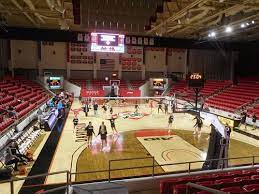
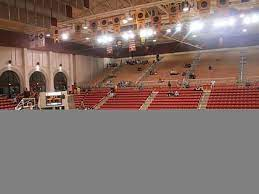
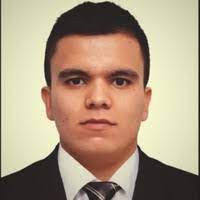
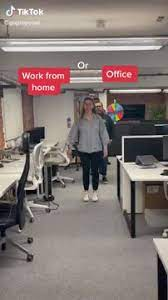
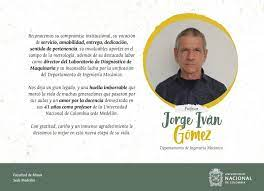
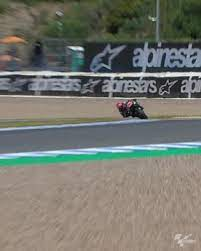
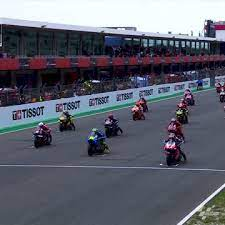
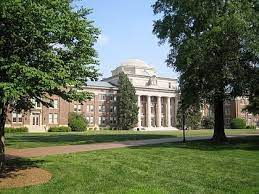
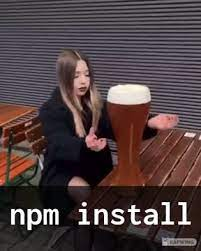
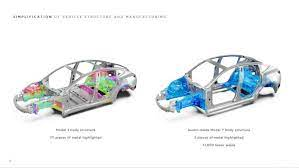
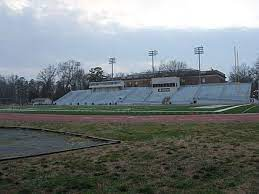
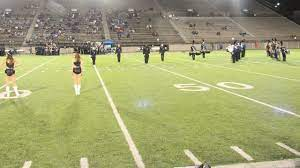
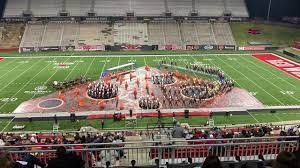
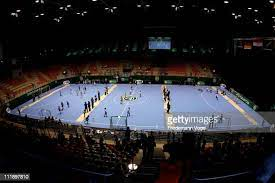
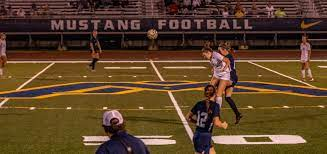
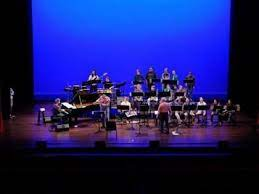
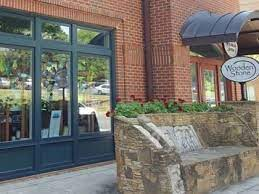
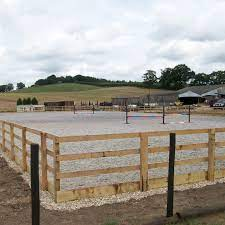
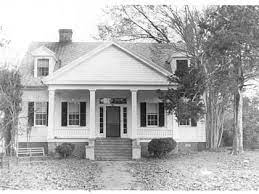
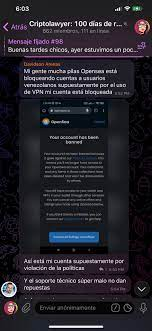

In [105]:
lista

In [93]:
x=1
for files in lista:
  if files.startswith('data:image'):
    urllib.request.urlretrieve(files, f'/content/drive/MyDrive/CarpetaTemporal/imagetoSave{x}.jpg')
    x += 1
  else:
    print('THIS IS OTHER TYPE OF FILE')


THIS IS OTHER TYPE OF FILE
THIS IS OTHER TYPE OF FILE
THIS IS OTHER TYPE OF FILE
THIS IS OTHER TYPE OF FILE
THIS IS OTHER TYPE OF FILE


In [94]:
import os

In [95]:
path_directory = '/content/drive/MyDrive/CarpetaTemporal'

In [112]:
list_of_images = []
x = 0
for i in os.listdir(path_directory):
  list_of_images.append(f'/content/drive/MyDrive/CarpetaTemporal/{i}')

In [159]:
list_of_images[0]

'/content/drive/MyDrive/CarpetaTemporal/imagetoSave.jpg'

# Reconocimiento de rostro en url de imágenes encontradas

In [99]:
!mkdir -p ~/.aws &&\
  cp /content/drive/My\ Drive/AWS/credencials.txt ~/.aws/credentials

In [100]:
import boto3
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [108]:
face = '/content/drive/MyDrive/FotosPaseos/DSC_6290.jpg'

In [115]:
face2 = list_of_images[0]

In [103]:
client = boto3.client(service_name='rekognition', region_name="us-east-2")

# **Termine comparando todas las imágenes contra la suya**

In [128]:
def rotate(filename):
  exif_dict = piexif.load(filename)
  img = plt.imread(filename)
  if piexif.ImageIFD.Orientation in exif_dict["0th"]:
      orientation = exif_dict["0th"][piexif.ImageIFD.Orientation]
      print(orientation)
      if orientation == 3:# 180 grados
          return cv2.rotate(img, cv2.ROTATE_180)
      elif orientation == 6: # 90 grados
          return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
      elif orientation == 8:#270
          return cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
      else:
          return img
  else:
      return img

In [144]:
def compareFaces(fileSource, fileTarget):
  image1=openImage(fileSource)
  image2=openImage(fileTarget)
  response=client.compare_faces(TargetImage={'Bytes': image2}, SourceImage={'Bytes': image1})
  faces=response['FaceMatches']
  box=response['FaceMatches'][0]['Face']['BoundingBox']
  image1=rotate(fileSource)
  img = rotate(fileTarget)
  img,_=rectFace(img,box)
  return image1,img

In [140]:
face_dessert = '/content/drive/MyDrive/FotosPaseos/daver_Desierto.jpg'
face_dessert_2 = '/content/drive/MyDrive/FotosPaseos/DaverDessertFacebook.jpg'
grupo = '/content/drive/MyDrive/FotosPaseos/family.jpg'
grupo2 = '/content/drive/MyDrive/FotosPaseos/graduacionIngeniero.jpg'
old_face1 = '/content/drive/MyDrive/FotosPaseos/FamiliaDaverChuiquito.jpg'
old_face2 = '/content/drive/MyDrive/FotosPaseos/CamiDaverAlesChingas.jpg'
two_faces = '/content/drive/MyDrive/FotosPaseos/daver_AnaSanAndres.jpg'
two_faces2 = '/content/drive/MyDrive/FotosPaseos/fotoSanAndresFace.jpg'
faceGafas = '/content/drive/MyDrive/FotosPaseos/monitos.jpg'
foto_carnet = '/content/drive/MyDrive/FotosPaseos/DSC_6290.jpg'

In [118]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [119]:
def openImage(file_image):
  with open(file_image, 'rb') as openfile:
    content = openfile.read()
  return content

In [155]:
image1=openImage('/content/drive/MyDrive/FotosPaseos/DSC_6290.jpg')
image2=openImage('/content/drive/MyDrive/FotosPaseos/FamiliaDaverChuiquito.jpg')
response=client.compare_faces(TargetImage={'Bytes': image2}, SourceImage={'Bytes': image1})

In [141]:
image1=openImage(foto_carnet)
image3=openImage(old_face1)
response=client.compare_faces(TargetImage={'Bytes': image3}, SourceImage={'Bytes': image1})

In [ ]:
response

In [151]:
!pip install piexif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
import piexif

In [156]:
faces=response['FaceMatches']
box=response['FaceMatches'][0]['Face']['BoundingBox']
img = rotate(grupo)
img,_=rectFace(img,box)

1


In [158]:
from matplotlib import gridspec
img1,img2=compareFaces(image1, image2)
plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])
#plt.subplot(1, 2, 1)
plt.subplot(gs[0])
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
#plt.subplot(1, 2, 2)
plt.subplot(gs[1])
plt.imshow(img2)
plt.xticks([])
plt.yticks([])

ValueError: ignored